<a href="https://colab.research.google.com/github/SuvarnaElawe/Test/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering wiht K - Means

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the Dataset
import pandas as pd
df = pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
%pip install yellowbrick plotly nbformat

In [4]:
### Separate X values (Age ,Income,Spending)

In [5]:
X = df[['Age','Income','Spending']]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
### Step 2: Apply Preporocesing on X

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipe = Pipeline([('impute',SimpleImputer(strategy='mean')),
                     ('scaler',StandardScaler())]).set_output(transform='pandas')

In [9]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [10]:
# Step 3: Find out optimum number of clusters using below

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

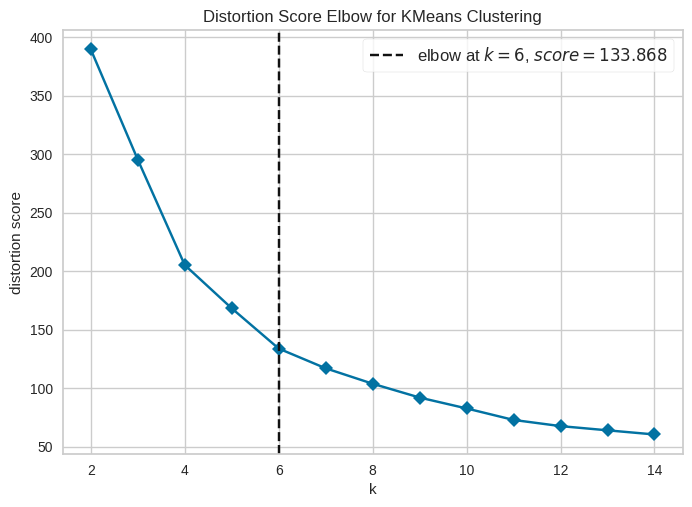

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer = KElbowVisualizer(KMeans(),k=(2,15),timings=False)
visualizer.fit(X_pre)
visualizer.show()

Create K means algorithm at k = 6 elbow is found at 6 from above graph

In [14]:
model1 = KMeans(n_clusters=6)
lab1 = model1.fit_predict(X_pre)


In [15]:
lab1

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 5,
       4, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [16]:
X2 = X.copy()

In [17]:
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [18]:
X2['Label1'] = lab1
X2

,Age,Income,Spending,Label1
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [19]:
X2[X2['Label1']==0]

,Age,Income,Spending,Label1
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0


In [20]:
for i in range(6):
  print(f'cluster number : {i}\n')
  display(X2[X2['Label1']==i])
  print('\n======================================================\n')

cluster number : 0



,Age,Income,Spending,Label1
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0




cluster number : 1



,Age,Income,Spending,Label1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1
69,32,48,47,1




cluster number : 2



,Age,Income,Spending,Label1
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




cluster number : 3



,Age,Income,Spending,Label1
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3




cluster number : 4



,Age,Income,Spending,Label1
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




cluster number : 5



,Age,Income,Spending,Label1
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


In [21]:
# for centroids
cent1 = X2.groupby(by='Label1').mean()
cent1

,Age,Income,Spending
Label1,,,
0,56.333333,54.266667,49.066667
1,26.684211,57.578947,47.789474
2,32.692308,86.538462,82.128205
3,41.939394,88.939394,16.969697
4,45.523810,26.285714,19.380952
5,25.250000,25.833333,76.916667


In [22]:
# Visualize abobe by Plotly

In [25]:
import plotly.express as px
fig1 = px.scatter_3d(data_frame=X2,x='Age',y='Income',z='Spending',color='Label1')
fig1.show()

In [28]:
# K Means Completed

In [29]:
### 2. Agglomerative Clustering (Hierarchical clustering)

In [30]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [32]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=6)
lab2 = model2.fit_predict(X_pre)
lab2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [33]:
X3 = X.copy()
X3

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [34]:
X3['Label2'] = lab2
X3

,Age,Income,Spending,Label2
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [35]:
for i in range(6):
  print(f'Cluster Name :{i}\n')
  display(X3[X3['Label2']==i])
  print('\n=========================================\n')

Cluster Name :0



,Age,Income,Spending,Label2
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Cluster Name :1



,Age,Income,Spending,Label2
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster Name :2



,Age,Income,Spending,Label2
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster Name :3



,Age,Income,Spending,Label2
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Cluster Name :4



,Age,Income,Spending,Label2
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Cluster Name :5



,Age,Income,Spending,Label2
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [36]:
fig2 = px.scatter_3d(data_frame=X3,x='Age',y='Income',z='Spending',color='Label2')
fig2.show()